<a href="https://colab.research.google.com/github/evmpython/CAT212_2025/blob/main/CAT212_Aula_02_Kolher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Disciplina:** CAT212 - Microfísica de Nuvens e Eletricidade Atmosférica
---

## **Aula Prática 2:** $\underline{Analisando\ a\ Curva\ de\ Köhler}$

---

**OBJETIVO:**
- Nesta aula prática aprenderemos como plotar e analisar o crescimento de uma gotícula de água líquida em função da saturação do ambiente, através da utilização da **Curva de Köhler**.



---


**DADOS DE ENTRADA**:
- **Tipo do dado:** dados gerados através do numpy  
- **Formato do dado:** arrays
- **Nome do arquivo:** Não tem
- **Fonte dos dados:** Não tem



---

**DADOS DE SAÍDA:**
- **Tipo do dado:** Figura
- **Formato do dado:** arquivo JPG
- **Imagens geradas:**
    1. Fig_1_curva_kohler_1.0.jpg
    2. Fig_2a_curva_kohler_2.1.jpg
    3. Fig_2b_curva_kohler_2.2.jpg
    4. Fig_2c_curva_kohler_2.3.jpg



---



**PROCEDIMENTO REALIZADO:**
- Os seguintes procedimentos são realizados nesse código:

1.   Plotar gráfico de **Saturação** versus **Raio de uma gotícula**
2.   Plotar gráfico de **Saturação** versus **Raio de uma gotícula**, adicionando o termo de curvatura e soluto
3.   Plotar gráfico de **Saturação** versus **Raio de uma gotícula**, para diferentes massas de soluto
4.   Plotar gráfico de **Saturação** versus **Raio de uma gotícula**, para diferentes temperaturas do ambiente


---




**OBSERVAÇÕES IMPORTANTES**:
1. Mudar o caminho para o do seu drive.




---

**PROFESSOR:**

 - Enrique Vieira Mattos - UNIFEI: enrique@unifei.edu.br / https://github.com/evmpython
 - Atualizado em: 25/03/2025

---

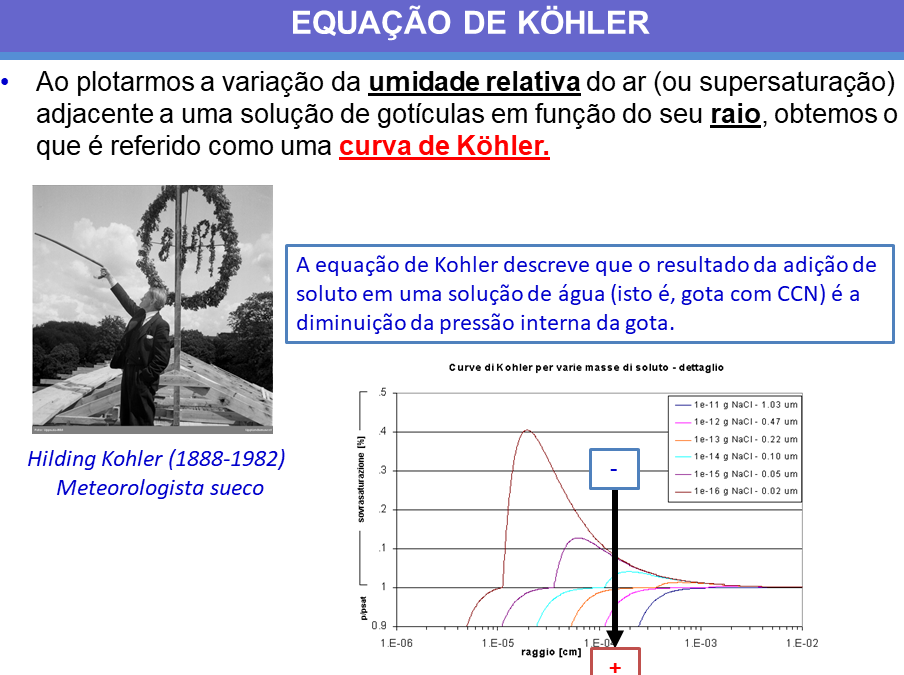

# **1° Passo:** Instalando o `Ultraplot`

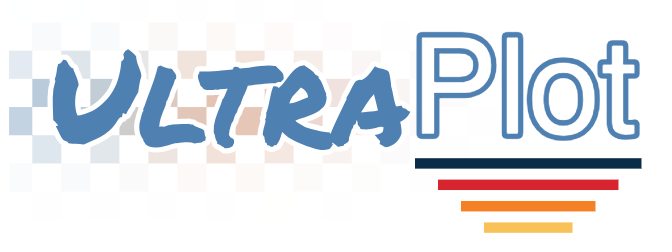

O [UltraPlot](https://github.com/Ultraplot/ultraplot) é uma biblioteca para produzir gráficos **bonitos** e de **alta qualidade** científica de **maneira fácil**. A grande vantagem do UltraPlot em relação ao Matplotlib para plotar gráficos é a sua sintaxe sucinta e a alta qualidade dos gráficos. Para maiores informações sobre o UltraPlot acesse:

- Pypi: https://pypi.org/project/ultraplot/

- GitHub: https://github.com/Ultraplot/

- Documentação: https://ultraplot.readthedocs.io/en/latest/

In [ ]:
!pip install -q ultraplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 28.6 MB/s eta 0:00:00


# **2° Passo:** Importando Bibliotecas

In [ ]:
import numpy as np        # Bilioteca que trabalha com matrizes
import ultraplot as uplt  # Bilioteca que gera figuras com alta qualidade
import os                 # Biblioteca para trabalhar com o sistema operacional

# vamos ignorar vários avisos
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.11/dist-packages/ultraplot/__init__.py:77: UltraPlotWarning: Rebuilding font cache. This usually happens after installing or updating ultraplot.
  register_fonts(default=True)


# **3° Passo:** Montando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **4° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**


- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [ ]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/1_PRIMEIRO_SEMESTRE/CAT212 - MICROFÍSICA DE NUVENS E ELETRICIDADE ATMOSFÉRICA/AULAS/CAT212 - PYTHON PARA METEOROLOGIA FÍSICA/AULA_02_CURVAS_KOLHER'

- Criando a pasta de saída ("output")

In [ ]:
os.makedirs(f'{dir}/output/', exist_ok=True)

# **PARTE 1:**
**ENUNCIADO**: Plote em um gráfico a **razão de saturação** versus o **raio da gotícula** para uma solução de gotículas de `sulfato
de amônio` à temperatura de **20°C**. Coloque o raio em escala logarítmica no eixo x.


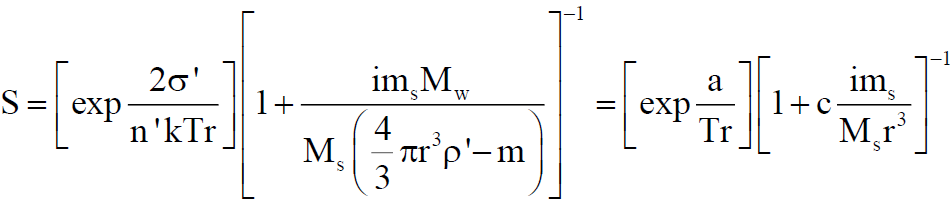


Na Equação de Köhler temos que:
*  **a** valor de 0,3335 $K \mu m$;
*  **c** valor de $4.3 \times 10^{12} \mu m^{3} g^{-1}$;
*  **ms** é a massa do soluto, com valor de $10^{-15}g$;
*  **Ms** é a massa molecular do soluto, com valor de 132,13;
*  **i** é o número de íons na água, com valor de 3;
*  **T** é a temperatura em K;
*  **r** é o raio da gotícula embrionária.

**RESPONDA: Qual é o raio da gotícula no pico da curva de Köhler?**

## **Vamos calcular a saturação**

In [ ]:
# Define as constantes
a = 0.3335   # [K.μm]
c = 4.3e12   # [μm3g-1]
ms = 1e-15   # Massa do soluto [g]
Ms = 132.13  # Massa molecular do soluto [g mol^-1]
i = 3.0      # Número de íons na água
temp = 293.0 # Temperatura do ambiente [K] 20+273

# Gera raios de 0.01 a 10 μm
raio1 = np.arange(0.01, 0.1, 0.01)
raio2 = np.arange(0.1, 1.0, 0.1)
raio3 = np.arange(1.0, 11, 1.0)
raio = np.concatenate((raio1, raio2, raio3))

# Calcula o Termo_A
termo_a = np.exp(a/(temp*raio))

# Calcula o Termo_B
termo_b = 1.0 / (1.0 + (c*(i*ms)/(Ms*raio**3)))

# Calcula a Saturação
S = termo_a * termo_b

In [ ]:
np.arange(1, 11, 2)

array([1, 3, 5, 7, 9])

In [ ]:
np.arange(0.01, 10, 0.01)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.

In [ ]:
raio

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ,  0.7 ,  0.8 ,  0.9 ,
        1.  ,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,  7.  ,  8.  ,  9.  ,
       10.  ])

In [ ]:
S

array([0.01136105, 0.08017045, 0.22501671, 0.40739258, 0.57439498,
       0.70189694, 0.79118991, 0.85188681, 0.89311684, 0.92148196,
       0.99358179, 1.00018466, 1.00132211, 1.00149683, 1.00144619,
       1.00134234, 1.00123287, 1.00113142, 1.00104114, 1.00055706,
       1.00037586, 1.00028307, 1.00022689, 1.00018927, 1.00016233,
       1.0001421 , 1.00012634, 1.00011373])

## **Plota o gráfico**

<a list of 1 Line2D objects>

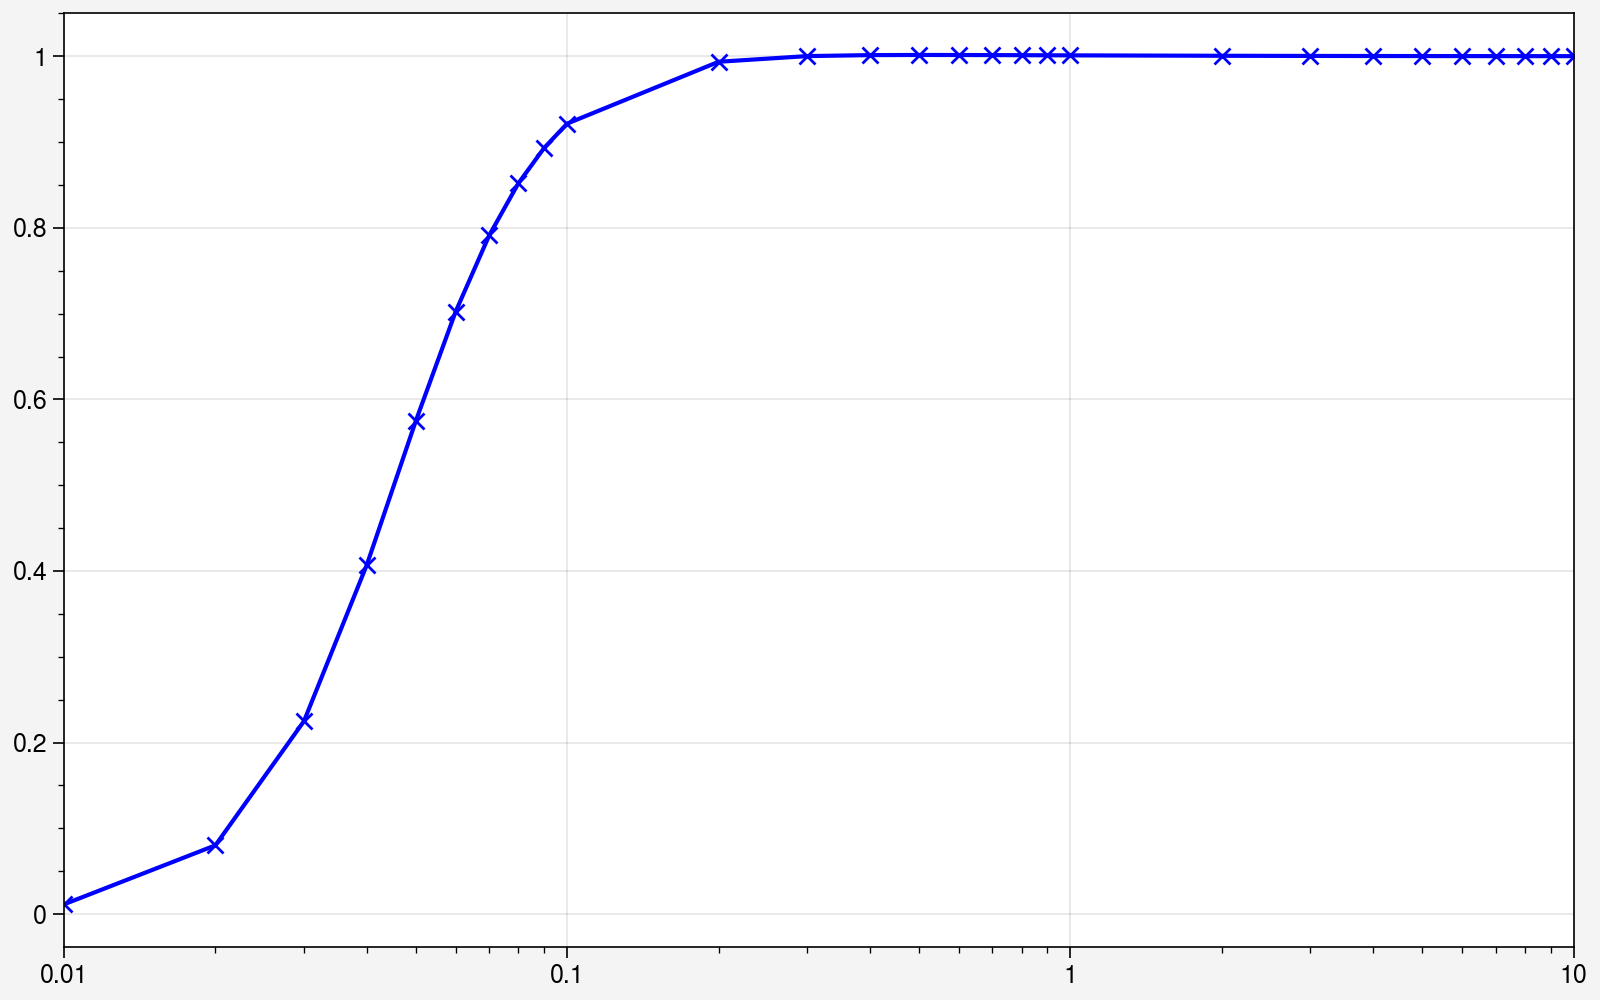

In [ ]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(8, 5), tight=True)

# plota gráfico de linha
ax.semilogx(raio, S, color='blue', marker='x')

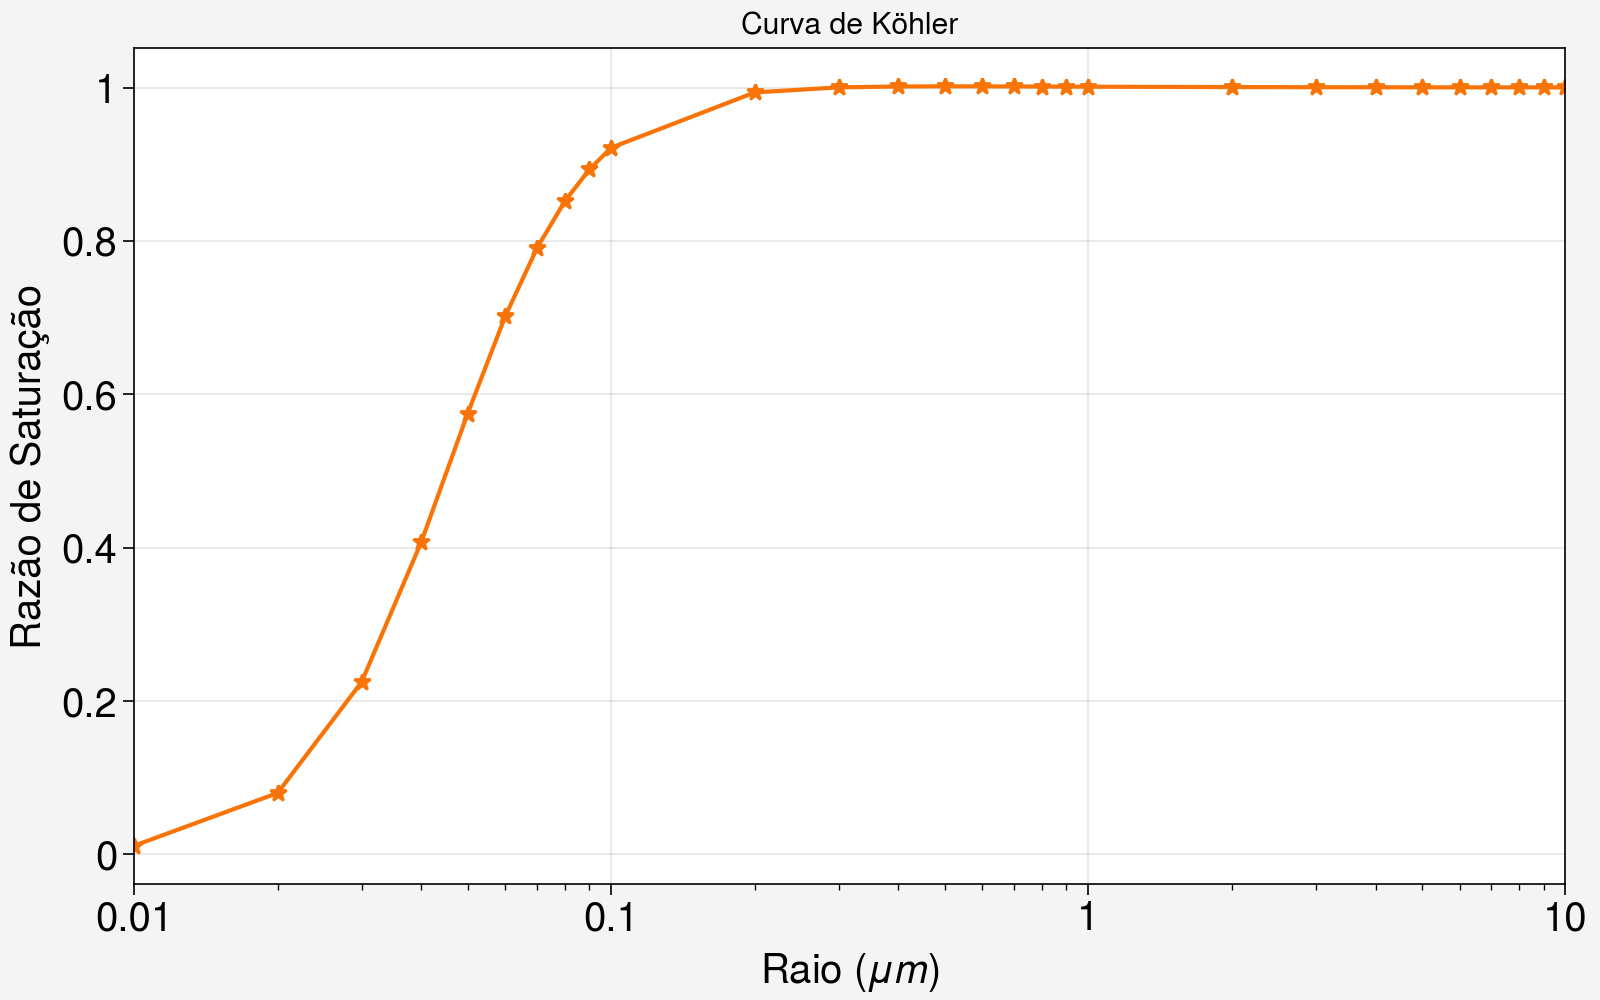

In [ ]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(8, 5), tight=True)

# plota gráfico de linha
ax.semilogx(raio, S, color='orange', marker='*')

# formatação de eixos etc
ax.format(xlabel='Raio ($\mu m$)', ylabel='Razão de Saturação',
          title='Curva de Köhler',
          xtickminor=True, ytickminor=False,
          small='20px', large='15px')

# salva figura
fig.save(f'{dir}/output/Aula_02_curva_kohler_1.0.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()

# **PARTE 2:**
**ENUNCIADO**: A equação de Köhler poder ser escrita da seguinte forma:

$$
S = 1 + \frac{a}{r} - \frac{b}{r^{3}}     
$$

*Em que:*

$$
a = \frac{2*\sigma}{\rho_{l}*R_{v}*T}
$$

e

$$
b = \frac{4*i*m_{s}*M_{v}}{3*\pi*\rho_{l}*M_{s}}
$$




* $\sigma$: tensão superficial = $7.5 \times 10^{-2} \frac{N}{m}$
* $i$: fator de Van't Hoff = 2
* $T$: temperatura do ar em K
* $\rho_{l}$: densidade da água = 1000 $kg\ m^{-3}$
* $m_{s}$: massa do soluto em g
* $M_{v}$: massa molar da água $(H_{2}O)$ = 18.02 $g\ mol^{-1}$
* $M_{s}$: massa molar do soluto = 58.44 (22.99+35.45) $g\ mol^{-1}$
* $R_{v}$: constante dos gases para o vapor = 482

## **2.1:** Plote a curva de Köhler para um soluto de massa $10\times^{-16}$ g à temperatura de `5ºC`. Seu raio deve variar entre 0.01 e 10 $\mu m$ e a razão de saturação entre 0,98 e 1,02. Coloque o raio em escala logarítmica no eixo x.

**Define as constantes de entrada**

In [ ]:
sigma = 7.5e-2    # tensão superficial [N/m]
i = 2             # fator de Van't Hoff
T = 5+273.15      # temperatura do ar [K]
rho = 1000        # densidade da água [kg m-3]
ms = 1e-16        # massa do soluto [g]
Mv = 18.02        # massa molar da água [g mol^-1]
Ms = 22.99+35.45  # massa molar do soluto NaCl (22.99+35.45) [g mol-1]
Rv = 482          # constante dos gases para o vapor

**Calcula a saturação:**

In [ ]:
# Constante 'a'
a = (2*sigma) / (rho*Rv*T)

# Constante 'b'
b = ((4*i*ms*Mv) / (3*np.pi*rho*Ms)) * 0.001

# Gera raios de 0.01 a 10 μm
raio1 = np.arange(0.01, 0.1, 0.01)
raio2 = np.arange(0.1, 1.0, 0.1)
raio3 = np.arange(1.0, 11, 1.0)
raio = np.concatenate((raio1, raio2, raio3))

# Transformar o raio de μm para metros[m]
raio = raio*1e-6

# Calcula a Saturação
S = 1 + (a/raio) - (b/raio**3)

print('valor da constante a=', a)
print('valor da constante b=', b)

valor da constante a= 1.118832714370213e-09
valor da constante b= 2.6173598672287973e-23


In [ ]:
(a/raio)

array([0.11188327, 0.05594164, 0.03729442, 0.02797082, 0.02237665,
       0.01864721, 0.01598332, 0.01398541, 0.01243147, 0.01118833,
       0.00559416, 0.00372944, 0.00279708, 0.00223767, 0.00186472,
       0.00159833, 0.00139854, 0.00124315, 0.00111883, 0.00055942,
       0.00037294, 0.00027971, 0.00022377, 0.00018647, 0.00015983,
       0.00013985, 0.00012431, 0.00011188])

In [ ]:
(b/raio**3)

array([2.61735987e+01, 3.27169983e+00, 9.69392543e-01, 4.08962479e-01,
       2.09388789e-01, 1.21174068e-01, 7.63078678e-02, 5.11203099e-02,
       3.59034275e-02, 2.61735987e-02, 3.27169983e-03, 9.69392543e-04,
       4.08962479e-04, 2.09388789e-04, 1.21174068e-04, 7.63078678e-05,
       5.11203099e-05, 3.59034275e-05, 2.61735987e-05, 3.27169983e-06,
       9.69392543e-07, 4.08962479e-07, 2.09388789e-07, 1.21174068e-07,
       7.63078678e-08, 5.11203099e-08, 3.59034275e-08, 2.61735987e-08])

In [ ]:
S

array([-25.0617154 ,  -2.2157582 ,   0.06790188,   0.61900834,
         0.81298786,   0.89747314,   0.93967546,   0.9628651 ,
         0.97652805,   0.98501473,   1.00232246,   1.00276005,
         1.00238812,   1.00202828,   1.00174355,   1.00152202,
         1.00134742,   1.00120724,   1.00109266,   1.00055614,
         1.00037197,   1.0002793 ,   1.00022356,   1.00018635,
         1.00015976,   1.0001398 ,   1.00012428,   1.00011186])

**Plota o gráfico**

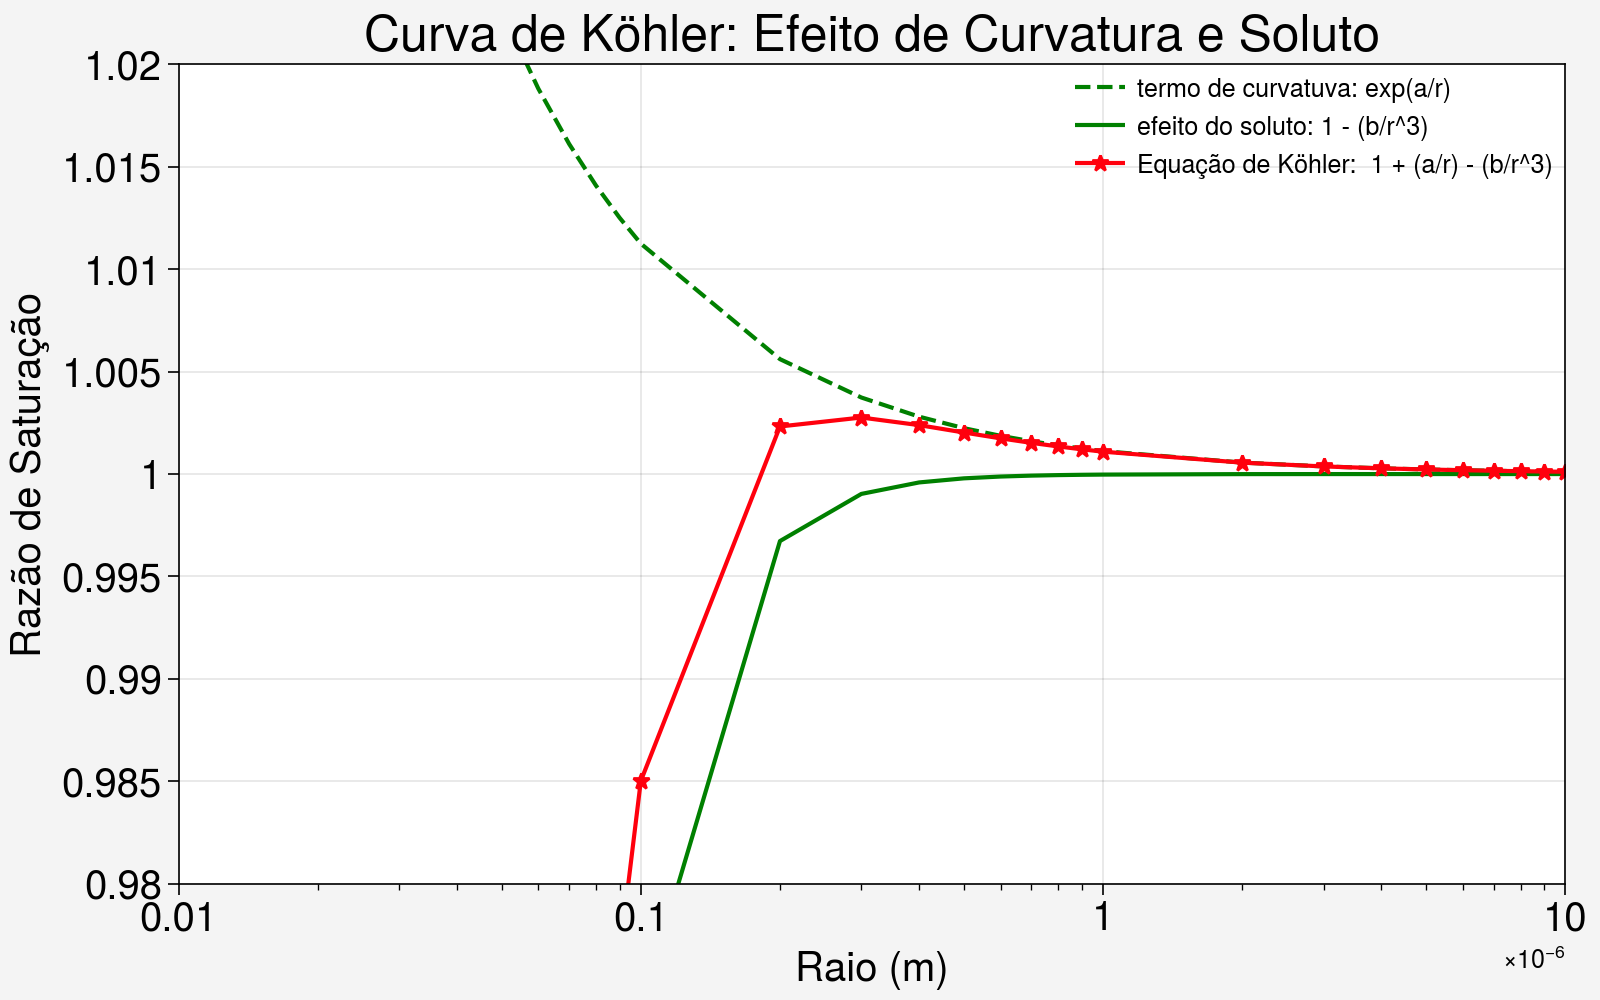

In [ ]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(8, 5), tight=True)

# plota o termo de curvatura
ax.semilogx(raio, np.exp(a/raio), color='green', linestyle='--', label='termo de curvatuva: exp(a/r)')

# Efeito do soluto
ax.semilogx(raio, (1 - (b/raio**3)), color='green', linestyle='-', label='efeito do soluto: 1 - (b/r^3)')

# plota gráfico de linha
ax.semilogx(raio, S, color='bright red', marker='*', label='Equação de Köhler:  1 + (a/r) - (b/r^3)')

# formatação de eixos etc
ax.format(xlabel='Raio (m)', ylabel='Razão de Saturação',
          title='Curva de Köhler: Efeito de Curvatura e Soluto',
          xtickminor=True, ytickminor=False,
          small='20px', large='25px',
          ylim=[0.98, 1.02])

# adiciona legenda
ax.legend(ncol=1, loc='upper right', frameon=False)

# salva figura
fig.save(f'{dir}/output/Aula_02a_curva_kohler_2.1.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()

## **2.2**. Sobre um novo gráfico, plote as curvas de Köhler para solutos de massa de $10\times^{-17}$ g, $10\times^{-16}$ g, e $10\times^{-15}$ g e temperatura de 5ºC. O eixo-x deve variar de 0,01 a 10 $\mu m$  e o eixo-y com razão de saturação entre 0,98 e 1,015.

**PERGUNTA:** Porque o raio e razão de saturação críticos mudam com o aumento da massa de soluto ? (Nessa questão o que esta variando é a massa do soluto).

**Define as constantes de entrada**

In [ ]:
sigma = 7.5e-2    # tensão superficial [N/m]
i = 2             # fator de Van't Hoff
T = 5+273.15      # temperatura do ar [K]
rho = 1000        # densidade da água [kg m-3]

ms_a = 1e-15      # massa do soluto A [g]
ms_b = 1e-16      # massa do soluto B [g]
ms_c = 1e-17      # massa do soluto C [g]

Mv = 18.02        # massa molar da água [g mol^-1]
Ms = 22.99+35.45  # massa molar do soluto NaCl (22.99+35.45) [g mol-1]
Rv = 482          # constante dos gases para o vapor

**Calcula a saturação:**

In [ ]:
# Gera raios de 0.01 a 10 μm
raio1 = np.arange(0.01, 0.1, 0.01)
raio2 = np.arange(0.1, 1.0, 0.1)
raio3 = np.arange(1.0, 11, 1.0)
raio = np.concatenate((raio1, raio2, raio3))

# Transformar o raio de μm para metros[m]
raio = raio*1e-6

# Constante 'a'
a = (2*sigma) / (rho*Rv*T)

# ------------------------------------------------ #
#                     SOLUTO A
# ------------------------------------------------ #
# Constante 'b'
b = ((4*i*ms_a*Mv) / (3*np.pi*rho*Ms)) * 0.001

# Calcula a Saturação
SA = 1 + (a/raio) - (b/raio**3)
print('valor da constante b para o soluto A=', ms_a, b)

# ------------------------------------------------ #
#                   SOLUTO B
# ------------------------------------------------ #
# Constante 'b'
b = ((4*i*ms_b*Mv) / (3*np.pi*rho*Ms)) * 0.001
print('valor da constante b para o soluto B=', ms_b, b)

# Calcula a Saturação
SB = 1 + (a/raio) - (b/raio**3)

# ------------------------------------------------ #
#                   SOLUTO C
# ------------------------------------------------ #
# Constante 'b'
b = ((4*i*ms_c*Mv) / (3*np.pi*rho*Ms)) * 0.001
print('valor da constante b para o soluto C=', ms_c, b)

# Calcula a Saturação
SC = 1 + (a/raio) - (b/raio**3)

valor da constante b para o soluto A= 1e-15 2.617359867228797e-22
valor da constante b para o soluto B= 1e-16 2.6173598672287973e-23
valor da constante b para o soluto C= 1e-17 2.6173598672287973e-24


In [ ]:
SA

array([-2.60624103e+02, -3.16610567e+01, -8.65663101e+00, -3.06165397e+00,
       -1.07151124e+00, -1.93093467e-01,  2.52904646e-01,  5.02782310e-01,
        6.53397199e-01,  7.49452340e-01,  9.72877165e-01,  9.94035517e-01,
        9.98707457e-01,  1.00014378e+00,  1.00065298e+00,  1.00083525e+00,
        1.00088734e+00,  1.00088411e+00,  1.00085710e+00,  1.00052670e+00,
        1.00036325e+00,  1.00027562e+00,  1.00022167e+00,  1.00018526e+00,
        1.00015907e+00,  1.00013934e+00,  1.00012396e+00,  1.00011162e+00])

In [ ]:
SB

array([-25.0617154 ,  -2.2157582 ,   0.06790188,   0.61900834,
         0.81298786,   0.89747314,   0.93967546,   0.9628651 ,
         0.97652805,   0.98501473,   1.00232246,   1.00276005,
         1.00238812,   1.00202828,   1.00174355,   1.00152202,
         1.00134742,   1.00120724,   1.00109266,   1.00055614,
         1.00037197,   1.0002793 ,   1.00022356,   1.00018635,
         1.00015976,   1.0001398 ,   1.00012428,   1.00011186])

In [ ]:
SC

array([-1.5054766 ,  0.72877165,  0.94035517,  0.98707457,  1.00143778,
        1.00652981,  1.00835254,  1.00887338,  1.00884113,  1.00857097,
        1.00526699,  1.0036325 ,  1.00275619,  1.00221673,  1.0018526 ,
        1.0015907 ,  1.00139343,  1.00123956,  1.00111622,  1.00055909,
        1.00037285,  1.00027967,  1.00022375,  1.00018646,  1.00015983,
        1.00013985,  1.00012431,  1.00011188])

In [ ]:
a/raio

array([0.11188327, 0.05594164, 0.03729442, 0.02797082, 0.02237665,
       0.01864721, 0.01598332, 0.01398541, 0.01243147, 0.01118833,
       0.00559416, 0.00372944, 0.00279708, 0.00223767, 0.00186472,
       0.00159833, 0.00139854, 0.00124315, 0.00111883, 0.00055942,
       0.00037294, 0.00027971, 0.00022377, 0.00018647, 0.00015983,
       0.00013985, 0.00012431, 0.00011188])

**Plota o gráfico**

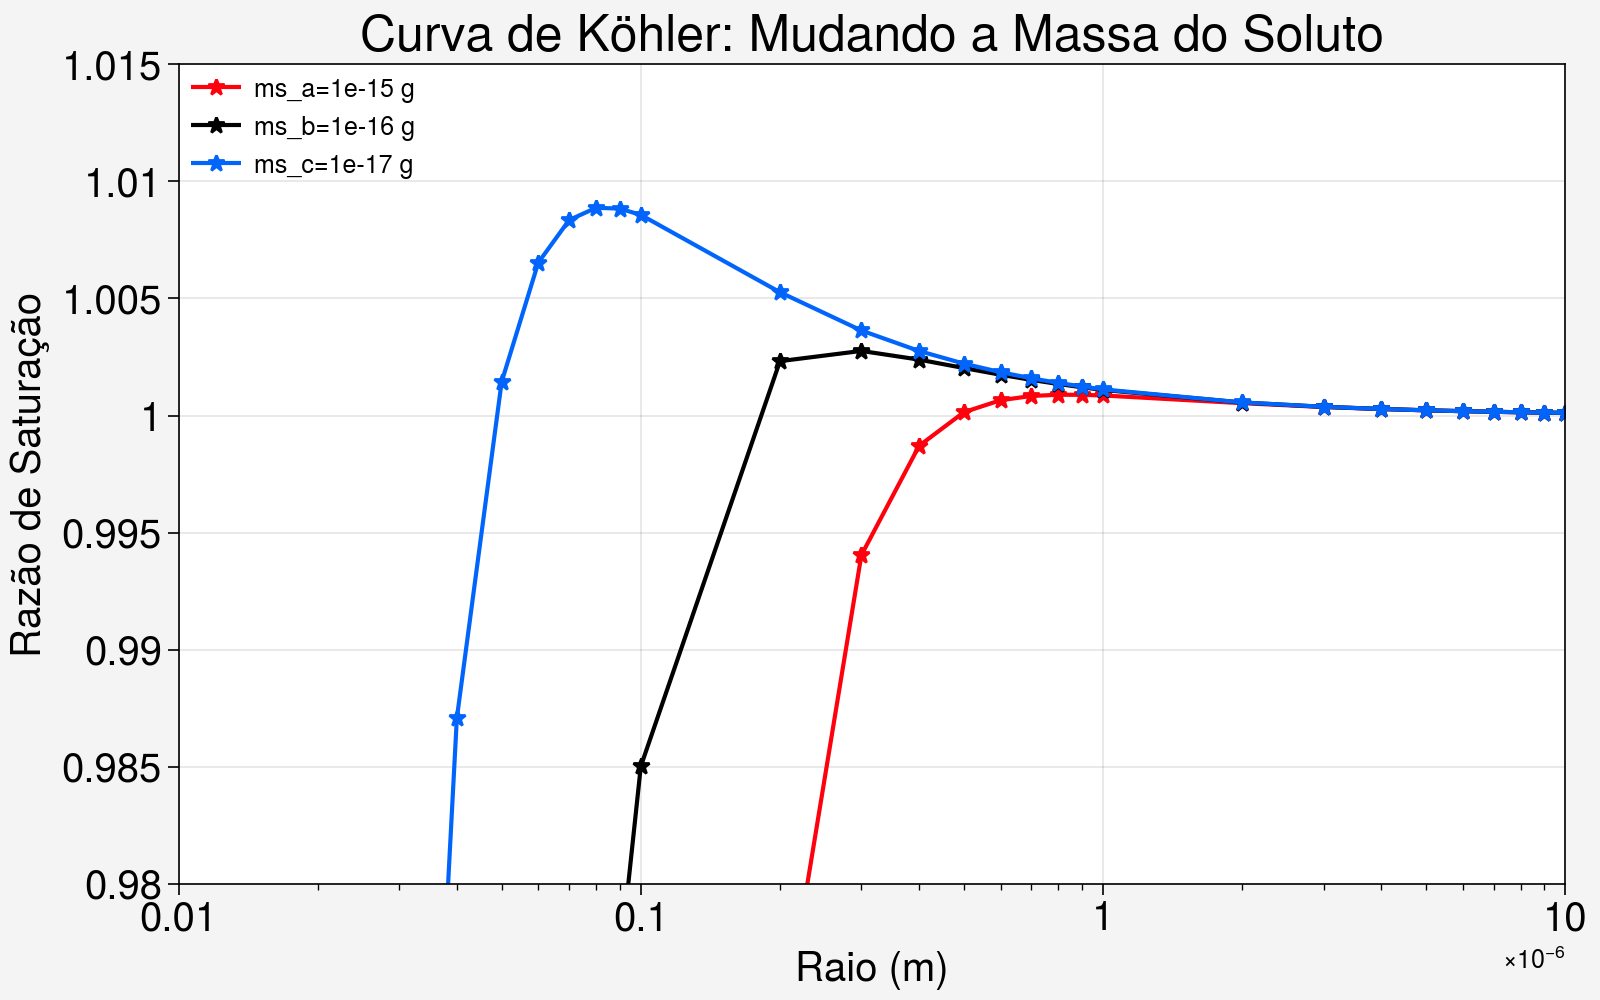

In [ ]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(8, 5), tight=True)

# plota gráfico de linha
ax.semilogx(raio, SA, color='bright red', marker='*', label=f'ms_a={str(ms_a)} g')
ax.semilogx(raio, SB, color='black', marker='*', label=f'ms_b={str(ms_b)} g')
ax.semilogx(raio, SC, color='bright blue', marker='*', label=f'ms_c={str(ms_c)} g')

# formatação de eixos etc
ax.format(xlabel='Raio (m)', ylabel='Razão de Saturação',
          title='Curva de Köhler: Mudando a Massa do Soluto',
          xtickminor=True, ytickminor=False,
          small='20px', large='25px',
          ylim=[0.98, 1.015])

# adiciona legenda
ax.legend(ncol=1, loc='upper left', frameon=False)

# salva figura
fig.save(f'{dir}/output/Aula_02b_curva_kohler_2.2.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()

**Na figura gerada, observamos que:** 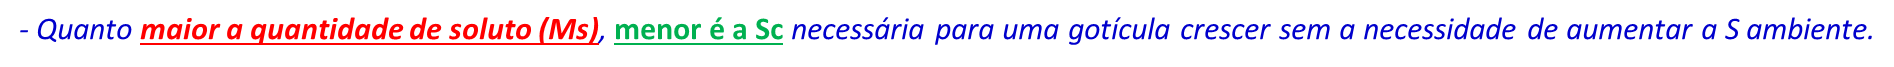

## **2.3**. Em um novo gráfico, plote as curvas de Köhler para soluto de massa $10\times^{-16}$ g e temperaturas de **15ºC**, **-5ºC** e **-15ºC**. O eixo-x deve variar de 0,01 a 10 $\mu m$ e o eixo-y com razão de saturação entre 1,000 e 1,005. *(Nessa questão o que está sendo mudando, é a temperatura do ambiente).*

**Define as constantes de entrada**

In [ ]:
sigma = 7.5e-2      # tensão superficial [N/m]
i = 2               # fator de Van't Hoff

T_a = -15 + 273.15  # temperatura do ar [K]
T_b =  -5 + 273.15  # temperatura do ar [K]
T_c =  15 + 273.15  # temperatura do ar [K]

rho = 1000          # densidade da água [kg m-3]
ms = 1e-16          # massa do soluto [g]
Mv = 18.02          # massa molar da água [g mol^-1]
Ms = 22.99+35.45    # massa molar do soluto NaCl (22.99+35.45) [g mol-1]
Rv = 482            # constante dos gases para o vapor

**Calcula a saturação**

In [ ]:
# Gera raios de 0.01 a 10 μm
raio1 = np.arange(0.01, 0.1, 0.01)
raio2 = np.arange(0.1, 1.0, 0.1)
raio3 = np.arange(1.0, 11, 1.0)
raio = np.concatenate((raio1, raio2, raio3))

# Transformar o raio de μm para metros[m]
raio = raio*1e-6

# Constante 'b'
b = ((4*i*ms*Mv) / (3*np.pi*rho*Ms)) * 0.001

# ------------------------------------------------ #
#                TEMPERATURA A
# ------------------------------------------------ #
# Constante 'a'
a = (2*sigma) / (rho*Rv*T_a)

# Calcula a Saturação
SA = 1 + (a/raio) - (b/raio**3)
print('valor da constante a, para a temperatura A=', T_a, a)

# ------------------------------------------------ #
#                   TEMPERATURA B
# ------------------------------------------------ #
# Constante 'a'
a = (2*sigma) / (rho*Rv*T_b)

# Calcula a Saturação
SB = 1 + (a/raio) - (b/raio**3)
print('valor da constante a, para a temperatura B=', T_b, a)

# ------------------------------------------------ #
#                  TEMPERATURA C
# ------------------------------------------------ #
# Constante 'a'
a = (2*sigma) / (rho*Rv*T_c)

# Calcula a Saturação
SC = 1 + (a/raio) - (b/raio**3)
print('valor da constante a, para a temperatura C=', T_c, a)

valor da constante a, para a temperatura A= 258.15 1.205513536711504e-09
valor da constante a, para a temperatura B= 268.15 1.1605568506510337e-09
valor da constante a, para a temperatura C= 288.15 1.0800045792194158e-09


**Plota o gráfico**

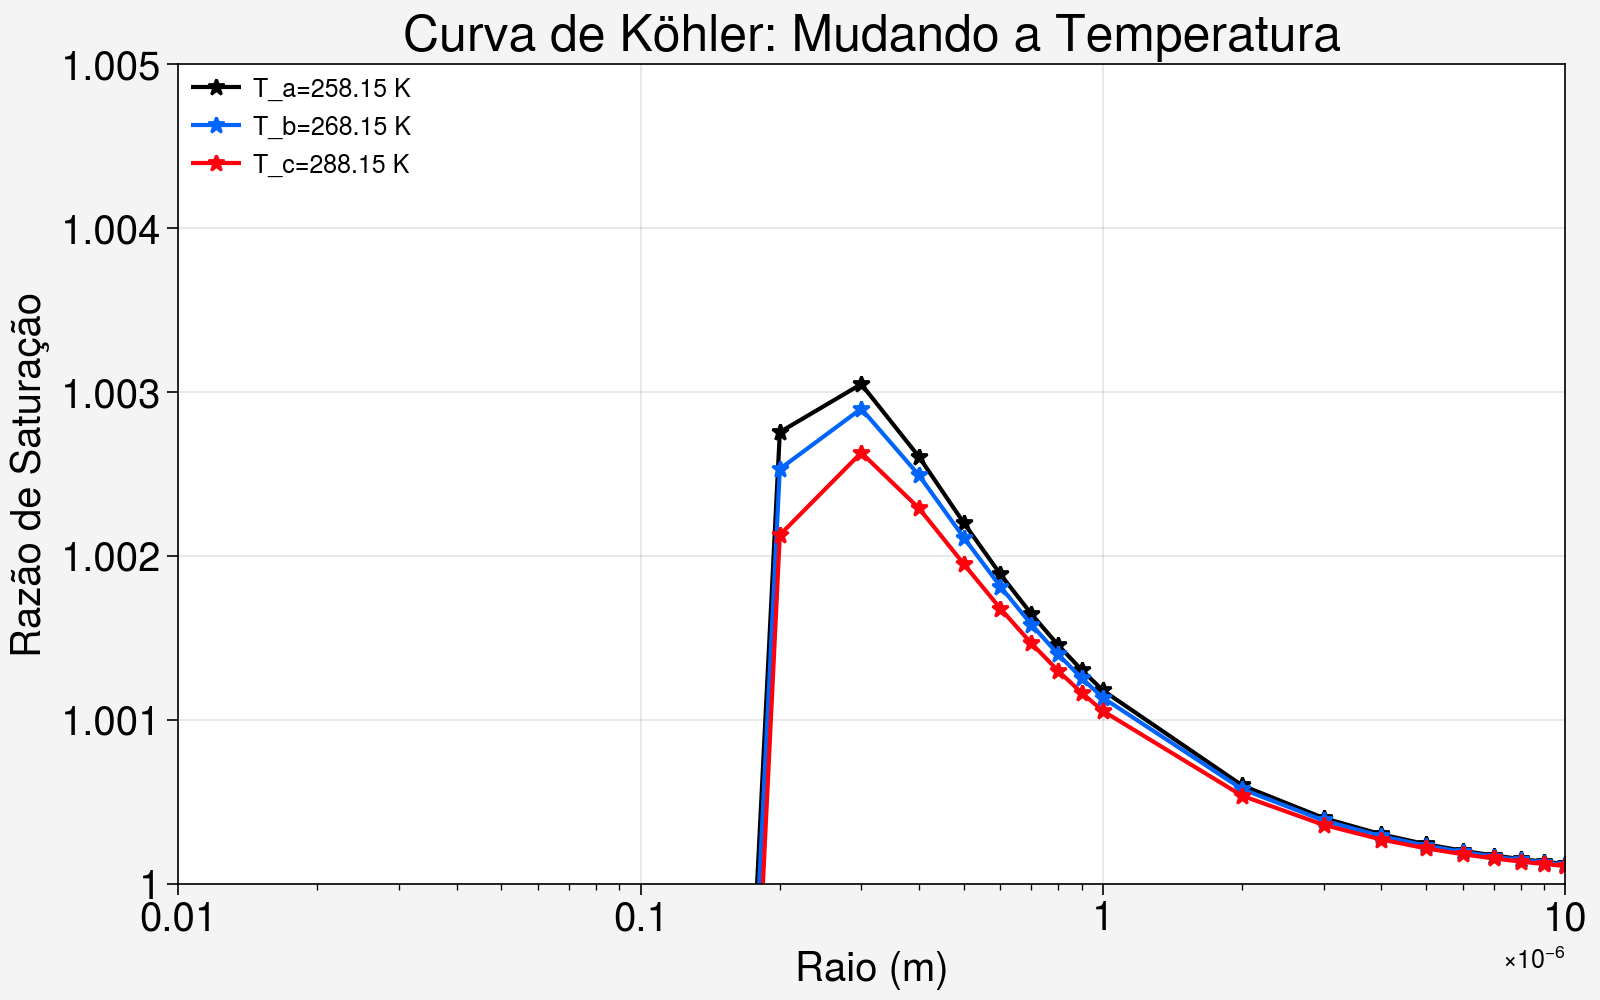

In [ ]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(8, 5), tight=True)

# plota gráfico de linha
ax.semilogx(raio, SA, color='black', marker='*', label=f'T_a={str(T_a)} K')
ax.semilogx(raio, SB, color='bright blue', marker='*', label=f'T_b={str(T_b)} K')
ax.semilogx(raio, SC, color='bright red', marker='*', label=f'T_c={str(T_c)} K')

# formatação de eixos etc
ax.format(xlabel='Raio (m)', ylabel='Razão de Saturação',
          title='Curva de Köhler: Mudando a Temperatura',
          xtickminor=True, ytickminor=False,
          small='20px', large='25px',
          ylim=[1.000, 1.005])

# adiciona legenda
ax.legend(ncol=1, loc='upper left', frameon=False)

# salva figura
fig.save(f'{dir}/output/Aula_02c_curva_kohler_2.3.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()